In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal, ROUND_HALF_UP
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib as mpl
import math
import re
import os
from colour import Color
from cycler import cycler
from IPython.core.display import display, HTML

In [2]:
pd.set_option('display.width', 2000)
pd.set_option('display.max_columns', None)
# from matplotlib import rcParams
# rcParams.update({'figure.autolayout': False})
sns.set_style('whitegrid')

In [3]:
year = 2018
event = 'dh'
gender = 'm'
topX = 20
splits = 5 # Could detect this from dataset, or or they always 5? @todo
image_gen = False
dpi = 300

In [4]:
from config import races

In [5]:
dfs = {}
for race in races[year]:
    racename = races[year][race]['name']
    raceName = races[year][race]['title']

    directory = event + str(race) + '_' + racename
    if os.path.exists(directory):
        file_prefix = event + str(race) + '_' + racename + '_' + gender
        file_prefix = os.path.join( directory, file_prefix )

        dfs[race] = pd.read_csv( file_prefix + '.merged.csv', index_col=0 )

In [6]:
chart_title_prefix = str(year) + ' Season, ' + ( 'Men' if gender == 'm' else 'Women' )

In [8]:
def formatDelta( time ):
    return ':'.join(str(time).split(':')[1:3])[:-3]

In [9]:
def convertToDelta( timestring ):
    timestring = str(timestring)

    if ":" not in timestring:
        timestring = str( cRound( timestring ) )
        timestring = "0:" + timestring

    timestring = "0:" + timestring

    return pd.to_timedelta( timestring )

In [10]:
def cRound( flt ):
    return float( Decimal( flt ).quantize( Decimal('.001' ), rounding=ROUND_HALF_UP ) )

In [11]:
def secondsToRaceTime( seconds ):
    return '%2dm%02ds' % divmod( seconds, 60 )

In [239]:
def colorList( col1, col2, cnt, pos1=0, pos2=1, pos3=2 ):
    clrs = list( Color( col1 ).range_to( Color( col2 ) , cnt ) )
    clrs = [ i.web for i in clrs ]
    if pos1 < cnt:
        clrs[pos1] = 'gold'
    if pos2 < cnt:
        clrs[pos2] = 'silver'
    if pos3 < cnt:
        clrs[pos3] = 'peru'

    return clrs

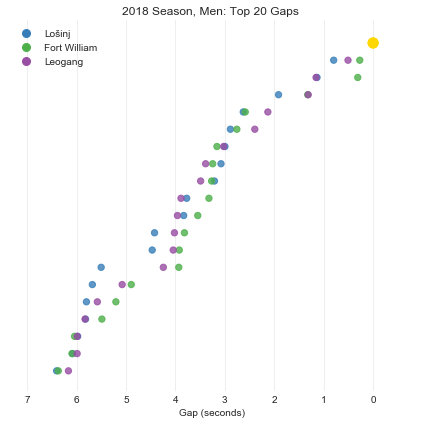

In [85]:
df = dfs[1]
legs = {}
col = 'split5_vs_winner'
title = chart_title_prefix + ': Top ' + str(topX) + ' Gaps '
timeCol = False
xlabel = 'Gap (seconds)'
labelPosOffsetX = .1

pltY = 3 * math.ceil( topX / 10 )
pltX = 2.5 * math.ceil( topX / 10 )+1
plt.subplots(figsize=(pltX,pltY))
#     plt.subplots()

if False == minX:
    minX = df[col][:topX].max()+1
if False == maxX:
    maxX = -.9


for race in dfs:
#     http://www.r-graph-gallery.com/38-rcolorbrewers-palettes/
    color = Color(rgb=sns.color_palette("Set1", 10)[race]).web
    colors = [color]*(len(df[col]))
    colors[int(df.loc[df['rank'] == 1].index.values)] = "gold"
    sizes = [40]*(len(df[col]))
    sizes[int(df.loc[df['rank'] == 1].index.values)] = 100

    # Build the chart
    plot = sns.regplot( y=dfs[race].index.values[0:topX], x=dfs[race][col][0:topX], fit_reg=False, scatter_kws={'color': colors, 's': sizes} )

    legs[race] = mlines.Line2D( [], [], color=color, marker='o', markersize=8, label=races[year][race]['title'], linestyle='' )


plot.invert_yaxis()
plot.invert_xaxis()
plt.xlim( minX, maxX )

# Format the chart
sns.despine()
plot.yaxis.set_visible(False)
plot.set_frame_on(False)
plot.grid( color='#EEEEEE', linewidth=1.0 )
plot.set( title=title, xlabel=xlabel )


plt.legend( handles=list(legs.values()) )
        
plt.tight_layout()

# xticks = [ secondsToRaceTime( int(t.get_text()) ) if 'm' not in t.get_text() else t.get_text() for t in plot.get_xticklabels() ]
# plot.set_xticklabels( xticks )

if image_gen:
    plt.gcf().subplots_adjust(left=0.3)
    plt.savefig( file_prefix + '_' + re.sub( '__', '_', re.sub( '[ :,]', '_', title[title.find( ':' )+2:].lower() ) ) + '.png', dpi=dpi )

['_2', '_3']

In [103]:
dfm = dfs[1]
sfxs = [ '_' + str(i) for i in list(dfs.keys())[1:] ]
for i in range( 2, len(dfs)+1 ):
    dfm = dfm.merge( dfs[i], left_on='name', right_on='name', how='inner', suffixes=sfxs )


In [104]:
dfm.head()

,bib_2,id_2,name,rank_2,speed_2,split1_2,split2_2,split3_2,split4_2,split5_2,start_2,start_rev_2,status_2,uci_2,split1_rank_2,split1_vs_best_2,split1_vs_winner_2,split2_rank_2,split2_vs_best_2,split2_vs_winner_2,split2_sector_2,split2_sector_rank_2,split2_sector_vs_best_2,split2_sector_vs_winner_2,split3_rank_2,split3_vs_best_2,split3_vs_winner_2,split3_sector_2,split3_sector_rank_2,split3_sector_vs_best_2,split3_sector_vs_winner_2,split4_rank_2,split4_vs_best_2,split4_vs_winner_2,split4_sector_2,split4_sector_rank_2,split4_sector_vs_best_2,split4_sector_vs_winner_2,split5_rank_2,split5_vs_best_2,split5_vs_winner_2,split5_sector_2,split5_sector_rank_2,split5_sector_vs_best_2,split5_sector_vs_winner_2,speed_ms_2,speed_ms_vs_best_2,speed_rank_2,points_2,BirthDate_2,CategoryCode_2,FamilyName_2,GivenName_2,Id_2,Nation_2,Outfit_2,PrintName_2,RaceId_2,RaceNr_2,ScoreboardName_2,StartOrder_2,StartTime_2,UciCode_2,UciRank_2,UciRiderId_2,UciTeamCode_2,UciTeamId_2,UciTeamName_2,WorldCupRank_2,Age_2,bib_3,id_3,q_rank_2,q_speed_2,q_split1_2,q_split2_2,q_split3_2,q_split4_2,q_split5_2,q_start_2,q_start_rev_2,q_status_2,uci_3,q_points_2,r_points_2,rank_3,speed_3,split1_3,split2_3,split3_3,split4_3,split5_3,start_3,start_rev_3,status_3,points_3,qr_diff_2,q_split1_rank_2,q_split1_vs_best_2,q_split1_vs_winner_2,q_split2_rank_2,q_split2_vs_best_2,q_split2_vs_winner_2,q_split2_sector_2,q_split2_sector_rank_2,q_split2_sector_vs_best_2,q_split2_sector_vs_winner_2,q_split3_rank_2,q_split3_vs_best_2,q_split3_vs_winner_2,q_split3_sector_2,q_split3_sector_rank_2,q_split3_sector_vs_best_2,q_split3_sector_vs_winner_2,q_split4_rank_2,q_split4_vs_best_2,q_split4_vs_winner_2,q_split4_sector_2,q_split4_sector_rank_2,q_split4_sector_vs_best_2,q_split4_sector_vs_winner_2,q_split5_rank_2,q_split5_vs_best_2,q_split5_vs_winner_2,q_split5_sector_2,q_split5_sector_rank_2,q_split5_sector_vs_best_2,q_split5_sector_vs_winner_2,split1_rank_3,split1_vs_best_3,split1_vs_winner_3,split2_rank_3,split2_vs_best_3,split2_vs_winner_3,split2_sector_3,split2_sector_rank_3,split2_sector_vs_best_3,split2_sector_vs_winner_3,split3_rank_3,split3_vs_best_3,split3_vs_winner_3,split3_sector_3,split3_sector_rank_3,split3_sector_vs_best_3,split3_sector_vs_winner_3,split4_rank_3,split4_vs_best_3,split4_vs_winner_3,split4_sector_3,split4_sector_rank_3,split4_sector_vs_best_3,split4_sector_vs_winner_3,split5_rank_3,split5_vs_best_3,split5_vs_winner_3,split5_sector_3,split5_sector_rank_3,split5_sector_vs_best_3,split5_sector_vs_winner_3,speed_ms_3,speed_ms_vs_best_3,speed_rank_3,q_speed_rank_2,BirthDate_3,CategoryCode_3,FamilyName_3,GivenName_3,Id_3,Nation_3,Outfit_3,PrintName_3,RaceId_3,RaceNr_3,ScoreboardName_3,StartOrder_3,StartTime_3,UciCode_3,UciRank_3,UciRiderId_3,UciTeamCode_3,UciTeamId_3,UciTeamName_3,WorldCupRank_3,Age_3,bib,id,q_rank_3,q_split1_3,q_split2_3,q_split3_3,q_split4_3,q_split5_3,q_start_3,q_start_rev_3,q_status_3,uci,q_points_3,r_points_3,rank,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff_3,q_split1_rank_3,q_split1_vs_best_3,q_split1_vs_winner_3,q_split2_rank_3,q_split2_vs_best_3,q_split2_vs_winner_3,q_split2_sector_3,q_split2_sector_rank_3,q_split2_sector_vs_best_3,q_split2_sector_vs_winner_3,q_split3_rank_3,q_split3_vs_best_3,q_split3_vs_winner_3,q_split3_sector_3,q_split3_sector_rank_3,q_split3_sector_vs_best_3,q_split3_sector_vs_winner_3,q_split4_rank_3,q_split4_vs_best_3,q_split4_vs_winner_3,q_split4_sector_3,q_split4_sector_rank_3,q_split4_sector_vs_best_3,q_split4_sector_vs_winner_3,q_split5_rank_3,q_split5_vs_best_3,q_split5_vs_winner_3,q_split5_sector_3,q_split5_sector_rank_3,q_split5_sector_vs_best_3,q_split5_sector_vs_winner_3,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_

In [131]:
sum( [ dfm[split + rc].fillna(1000) for rc in [ '', '_2', '_3' ] ] )

0      611.514
1      670.924
2     1338.563
3      615.398
4      618.263
5      613.994
6      610.114
7      609.472
8      615.185
9      631.112
10     623.787
11     620.425
12     627.497
13     618.761
14     618.318
15     665.630
16     621.597
17     611.163
18     624.457
19     620.863
20    2146.684
21    2146.989
22    1427.847
23     619.416
24     626.704
25    1346.400
26    1435.885
27     636.115
28    1349.650
29    2148.203
30    1437.405
31    1353.694
32    1436.119
33    1427.395
34     628.748
35    1437.440
36     637.202
37    1435.094
38    2150.225
39     636.682
40    1352.287
41    1354.983
42    1440.218
43     639.544
44    2151.723
45     637.667
46    2152.985
47    2153.209
48    2153.219
49    2153.908
50    1352.094
51    1364.856
52    2163.414
53    2168.483
54    1637.687
55    2216.725
56    2226.392
57    1472.481
58    1471.989
dtype: float64

In [250]:
# dfb = pd.DataFrame()
dfd = {
    'name': 'PERFECT Run'
}
for rc in dfs:
    for sp in range( 1, splits+1 ):
        split = 'split' + str(sp) + ( '_' + str(rc) if rc > 1 else '' )
        dfd[split] = dfm[split].min()
        if ( sp > 1 ):
            sector = 'split' + str(sp) + '_sector' + ( '_' + str(rc) if rc > 1 else '' )
            dfd[sector] = dfm[sector].min()

dfb = pd.DataFrame( list(dfd.values()) ).T
# list(dfb.values())
dfb.columns = list(dfd.keys())
dfb.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3
0,PERFECT Run,45.256,80.466,34.941,118.357,37.211,160.917,42.458,190.991,30.028,20.613,52.86,32.05,80.785,27.751,116.514,35.307,139.193,21.897,59.142,185.501,124.899,211.297,25.796,247.279,35.521,274.452,25.958


In [251]:
dfm.sort_values( 'split5_t', ascending=True, inplace=True )
dfm.reset_index( drop=True, inplace=True )
dfm.head()

,bib_2,id_2,name,rank_2,speed_2,split1_2,split2_2,split3_2,split4_2,split5_2,start_2,start_rev_2,status_2,uci_2,split1_rank_2,split1_vs_best_2,split1_vs_winner_2,split2_rank_2,split2_vs_best_2,split2_vs_winner_2,split2_sector_2,split2_sector_rank_2,split2_sector_vs_best_2,split2_sector_vs_winner_2,split3_rank_2,split3_vs_best_2,split3_vs_winner_2,split3_sector_2,split3_sector_rank_2,split3_sector_vs_best_2,split3_sector_vs_winner_2,split4_rank_2,split4_vs_best_2,split4_vs_winner_2,split4_sector_2,split4_sector_rank_2,split4_sector_vs_best_2,split4_sector_vs_winner_2,split5_rank_2,split5_vs_best_2,split5_vs_winner_2,split5_sector_2,split5_sector_rank_2,split5_sector_vs_best_2,split5_sector_vs_winner_2,speed_ms_2,speed_ms_vs_best_2,speed_rank_2,points_2,BirthDate_2,CategoryCode_2,FamilyName_2,GivenName_2,Id_2,Nation_2,Outfit_2,PrintName_2,RaceId_2,RaceNr_2,ScoreboardName_2,StartOrder_2,StartTime_2,UciCode_2,UciRank_2,UciRiderId_2,UciTeamCode_2,UciTeamId_2,UciTeamName_2,WorldCupRank_2,Age_2,bib_3,id_3,q_rank_2,q_speed_2,q_split1_2,q_split2_2,q_split3_2,q_split4_2,q_split5_2,q_start_2,q_start_rev_2,q_status_2,uci_3,q_points_2,r_points_2,rank_3,speed_3,split1_3,split2_3,split3_3,split4_3,split5_3,start_3,start_rev_3,status_3,points_3,qr_diff_2,q_split1_rank_2,q_split1_vs_best_2,q_split1_vs_winner_2,q_split2_rank_2,q_split2_vs_best_2,q_split2_vs_winner_2,q_split2_sector_2,q_split2_sector_rank_2,q_split2_sector_vs_best_2,q_split2_sector_vs_winner_2,q_split3_rank_2,q_split3_vs_best_2,q_split3_vs_winner_2,q_split3_sector_2,q_split3_sector_rank_2,q_split3_sector_vs_best_2,q_split3_sector_vs_winner_2,q_split4_rank_2,q_split4_vs_best_2,q_split4_vs_winner_2,q_split4_sector_2,q_split4_sector_rank_2,q_split4_sector_vs_best_2,q_split4_sector_vs_winner_2,q_split5_rank_2,q_split5_vs_best_2,q_split5_vs_winner_2,q_split5_sector_2,q_split5_sector_rank_2,q_split5_sector_vs_best_2,q_split5_sector_vs_winner_2,split1_rank_3,split1_vs_best_3,split1_vs_winner_3,split2_rank_3,split2_vs_best_3,split2_vs_winner_3,split2_sector_3,split2_sector_rank_3,split2_sector_vs_best_3,split2_sector_vs_winner_3,split3_rank_3,split3_vs_best_3,split3_vs_winner_3,split3_sector_3,split3_sector_rank_3,split3_sector_vs_best_3,split3_sector_vs_winner_3,split4_rank_3,split4_vs_best_3,split4_vs_winner_3,split4_sector_3,split4_sector_rank_3,split4_sector_vs_best_3,split4_sector_vs_winner_3,split5_rank_3,split5_vs_best_3,split5_vs_winner_3,split5_sector_3,split5_sector_rank_3,split5_sector_vs_best_3,split5_sector_vs_winner_3,speed_ms_3,speed_ms_vs_best_3,speed_rank_3,q_speed_rank_2,BirthDate_3,CategoryCode_3,FamilyName_3,GivenName_3,Id_3,Nation_3,Outfit_3,PrintName_3,RaceId_3,RaceNr_3,ScoreboardName_3,StartOrder_3,StartTime_3,UciCode_3,UciRank_3,UciRiderId_3,UciTeamCode_3,UciTeamId_3,UciTeamName_3,WorldCupRank_3,Age_3,bib,id,q_rank_3,q_split1_3,q_split2_3,q_split3_3,q_split4_3,q_split5_3,q_start_3,q_start_rev_3,q_status_3,uci,q_points_3,r_points_3,rank,split1,split2,split3,split4,split5,start,start_rev,status,points,qr_diff_3,q_split1_rank_3,q_split1_vs_best_3,q_split1_vs_winner_3,q_split2_rank_3,q_split2_vs_best_3,q_split2_vs_winner_3,q_split2_sector_3,q_split2_sector_rank_3,q_split2_sector_vs_best_3,q_split2_sector_vs_winner_3,q_split3_rank_3,q_split3_vs_best_3,q_split3_vs_winner_3,q_split3_sector_3,q_split3_sector_rank_3,q_split3_sector_vs_best_3,q_split3_sector_vs_winner_3,q_split4_rank_3,q_split4_vs_best_3,q_split4_vs_winner_3,q_split4_sector_3,q_split4_sector_rank_3,q_split4_sector_vs_best_3,q_split4_sector_vs_winner_3,q_split5_rank_3,q_split5_vs_best_3,q_split5_vs_winner_3,q_split5_sector_3,q_split5_sector_rank_3,q_split5_sector_vs_best_3,q_split5_sector_vs_winner_3,split1_rank,split1_vs_best,split1_vs_winner,split2_rank,split2_vs_best,split2_vs_winner,split2_sector,split2_sector_rank,split2_sector_vs_best,split2_sector_vs_winner,split3_rank,split3_vs_best,split3_vs_winner,split3_sector,split3_sector_rank,split3_sector_vs_best,split3_sector_vs_winner,split4_rank,split4_vs_

In [252]:
list(dfd.keys())
data = dfm[ list(dfd.keys()) ][:topX].copy()
data = data.append( dfb ).sort_values( 'split5' ).reset_index( drop=True )
data.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3
0,PERFECT Run,45.256,80.466,34.941,118.357,37.211,160.917,42.458,190.991,30.028,20.613,52.86,32.05,80.785,27.751,116.514,35.307,139.193,21.897,59.142,185.501,124.899,211.297,25.796,247.279,35.521,274.452,25.958
1,PIERRON Amaury,45.256,80.744,35.488,118.416,37.672,160.917,42.501,190.991,30.074,20.807,54.254,33.447,82.114,27.86,120.823,38.709,145.72,24.897,60.602,185.501,124.899,211.297,25.796,247.279,35.982,274.452,27.173
2,GWIN Aaron,45.525,80.466,34.941,118.357,37.891,161.112,42.755,191.499,30.387,20.81,52.86,32.05,80.785,27.925,116.514,35.729,139.193,22.679,60.058,190.789,130.731,217.343,26.554,253.837,36.494,280.822,26.985
3,GREENLAND Laurie,45.649,81.097,35.448,119.363,38.266,161.821,42.458,192.146,30.325,21.152,54.779,33.627,83.42,28.641,119.614,36.194,142.191,22.577,60.674,188.69,128.016,214.955,26.265,251.82,36.865,279.657,27.837
4,BROSNAN Troy,45.808,81.241,35.433,119.218,37.977,161.996,42.778,192.305,30.309,21.022,55.352,34.33,83.637,28.285,120.046,36.409,142.404,22.358,60.101,186.402,126.301,212.226,25.824,248.301,36.075,274.763,26.462


In [253]:
for sp in range( 1, splits+1 ):
    split = 'split' + str(sp)
#     rsplit = split + ( '_' + str(rc) if rc > 1 else '' )
    data[split + '_sector_t'] = sum( [ data[split + ( '_sector' if sp > 1 else '' ) + rc].fillna(1000) for rc in [ '' ] + [ '_' + str(i) for i in range( 2, len(dfs)+1 ) ] ] )
    data[split + '_t'] = sum( [ data[split + rc].fillna(1000) for rc in [ '' ] + [ '_' + str(i) for i in range( 2, len(dfs)+1 ) ] ] )
data['rank_t'] = data['split5_t'].rank( method='dense', ascending=True )
data = data.sort_values( 'split5_t' ).reset_index( drop=True )

data.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,split1_sector_t,split1_t,split2_sector_t,split2_t,split3_sector_t,split3_t,split4_sector_t,split4_t,split5_sector_t,split5_t,rank_t
0,PERFECT Run,45.256,80.466,34.941,118.357,37.211,160.917,42.458,190.991,30.028,20.613,52.86,32.05,80.785,27.751,116.514,35.307,139.193,21.897,59.142,185.501,124.899,211.297,25.796,247.279,35.521,274.452,25.958,125.011,125.011,191.890,318.827,90.758,410.439,113.286,524.710,77.883,604.636,1.0
1,BROSNAN Troy,45.808,81.241,35.433,119.218,37.977,161.996,42.778,192.305,30.309,21.022,55.352,34.33,83.637,28.285,120.046,36.409,142.404,22.358,60.101,186.402,126.301,212.226,25.824,248.301,36.075,274.763,26.462,126.931,126.931,196.064,322.995,92.086,415.081,115.262,530.343,79.129,609.472,2.0
2,VERGIER Loris,46.139,81.51,35.371,119.483,37.973,162.984,43.501,193.121,30.137,21.076,56.543,35.467,84.294,27.751,119.956,35.662,142.271,22.315,60.79,186.001,125.211,211.93,25.929,248.287,36.357,274.722,26.435,128.005,128.005,196.049,324.054,91.653,415.707,115.520,531.227,78.887,610.114,3.0
3,PIERRON Amaury,45.256,80.744,35.488,118.416,37.672,160.917,42.501,190.991,30.074,20.807,54.254,33.447,82.114,27.86,120.823,38.709,145.72,24.897,60.602,185.501,124.899,211.297,25.796,247.279,35.982,274.452,27.173,126.665,126.665,193.834,320.499,91.328,411.827,117.192,529.019,82.144,611.163,4.0
4,GWIN Aaron,45.525,80.466,34.941,118.357,37.891,161.112,42.755,191.499,30.387,20.81,52.86,32.05,80.785,27.925,116.514,35.729,139.193,22.679,60.058,190.789,130.731,217.343,26.554,253.837,36.494,280.822,26.985,126.393,126.393,197.722,324.115,92.370,416.485,114.978,531.463,80.051,611.514,5.0


In [254]:
data.keys()

Index(['name', 'split1', 'split2', 'split2_sector', 'split3', 'split3_sector', 'split4', 'split4_sector', 'split5', 'split5_sector', 'split1_2', 'split2_2', 'split2_sector_2', 'split3_2', 'split3_sector_2', 'split4_2', 'split4_sector_2', 'split5_2', 'split5_sector_2', 'split1_3', 'split2_3', 'split2_sector_3', 'split3_3', 'split3_sector_3', 'split4_3', 'split4_sector_3', 'split5_3', 'split5_sector_3', 'split1_sector_t', 'split1_t', 'split2_sector_t', 'split2_t', 'split3_sector_t', 'split3_t', 'split4_sector_t', 'split4_t', 'split5_sector_t', 'split5_t', 'rank_t'], dtype='object')

In [255]:
# https://seaborn.pydata.org/examples/pairgrid_dotplot.html
# display( list(dfm.columns ))
# data = dfm[[ 'name', 'rank', 'split1', 'split2_sector', 'split3_sector', 'split4_sector', 'split5_sector']].copy()
# best = pd.DataFrame( [[ 'PERFECT Run', 0, dfm['split1'].min(), dfm['split2_sector'].min(), dfm['split3_sector'].min(), dfm['split4_sector'].min(), dfm['split5_sector'].min() ]], columns=data.columns )
# data = data.append( best ).sort_values( 'rank' ).reset_index( drop=True )

# Expand data set
data['split1_sector'] = data['split1_t']
for i in range( 2, splits+1 ):
    data['split' + str(i)] = data['split' + str(i-1) + '_t'] + data['split' + str(i) + '_sector_t']
for i in range( 1, splits+1 ):
    split = 'split' + str(i)
    sector = split + '_sector'
    data[split + '_rank'] = data[split].rank(method='dense')
    data[split + '_vs_best'] = (data[split] - data[split].min())
data['rank'] = data['split5_rank']
data = data.sort_values( 'split5_vs_best' ).reset_index( drop=True )

data.head()

,name,split1,split2,split2_sector,split3,split3_sector,split4,split4_sector,split5,split5_sector,split1_2,split2_2,split2_sector_2,split3_2,split3_sector_2,split4_2,split4_sector_2,split5_2,split5_sector_2,split1_3,split2_3,split2_sector_3,split3_3,split3_sector_3,split4_3,split4_sector_3,split5_3,split5_sector_3,split1_sector_t,split1_t,split2_sector_t,split2_t,split3_sector_t,split3_t,split4_sector_t,split4_t,split5_sector_t,split5_t,rank_t,split1_sector,split1_rank,split1_vs_best,split2_rank,split2_vs_best,split3_rank,split3_vs_best,split4_rank,split4_vs_best,split5_rank,split5_vs_best,rank
0,PERFECT Run,45.256,316.901,34.941,409.585,37.211,523.725,42.458,602.593,30.028,20.613,52.86,32.05,80.785,27.751,116.514,35.307,139.193,21.897,59.142,185.501,124.899,211.297,25.796,247.279,35.521,274.452,25.958,125.011,125.011,191.890,318.827,90.758,410.439,113.286,524.710,77.883,604.636,1.0,125.011,1.0,0,1.0,0.000,1.0,0.000,1.0,0.000,1.0,0.000,1.0
1,BROSNAN Troy,45.808,322.995,35.433,415.081,37.977,530.343,42.778,609.472,30.309,21.022,55.352,34.33,83.637,28.285,120.046,36.409,142.404,22.358,60.101,186.402,126.301,212.226,25.824,248.301,36.075,274.763,26.462,126.931,126.931,196.064,322.995,92.086,415.081,115.262,530.343,79.129,609.472,2.0,126.931,6.0,0.552,3.0,6.094,3.0,5.496,3.0,6.618,2.0,6.879,2.0
2,VERGIER Loris,46.139,324.054,35.371,415.707,37.973,531.227,43.501,610.114,30.137,21.076,56.543,35.467,84.294,27.751,119.956,35.662,142.271,22.315,60.79,186.001,125.211,211.93,25.929,248.287,36.357,274.722,26.435,128.005,128.005,196.049,324.054,91.653,415.707,115.520,531.227,78.887,610.114,3.0,128.005,7.0,0.883,5.0,7.153,4.0,6.122,4.0,7.502,3.0,7.521,3.0
3,PIERRON Amaury,45.256,320.499,35.488,411.827,37.672,529.019,42.501,611.163,30.074,20.807,54.254,33.447,82.114,27.86,120.823,38.709,145.72,24.897,60.602,185.501,124.899,211.297,25.796,247.279,35.982,274.452,27.173,126.665,126.665,193.834,320.499,91.328,411.827,117.192,529.019,82.144,611.163,4.0,126.665,1.0,0,2.0,3.598,2.0,2.242,2.0,5.294,4.0,8.570,4.0
4,GWIN Aaron,45.525,324.115,34.941,416.485,37.891,531.463,42.755,611.514,30.387,20.81,52.86,32.05,80.785,27.925,116.514,35.729,139.193,22.679,60.058,190.789,130.731,217.343,26.554,253.837,36.494,280.822,26.985,126.393,126.393,197.722,324.115,92.370,416.485,114.978,531.463,80.051,611.514,5.0,126.393,2.0,0.269,6.0,7.214,6.0,6.900,5.0,7.738,5.0,8.921,5.0


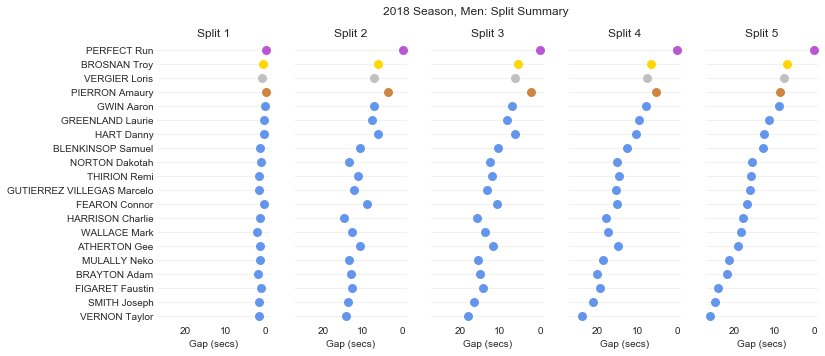

In [256]:


# Rearrange columns
data = data[list(data.columns[:2]) + list(sorted(data.columns[2:]))]

# Make the PairGrid
g = sns.PairGrid( data[:topX], x_vars=['split1_vs_best', 'split2_vs_best', 'split3_vs_best', 'split4_vs_best', 'split5_vs_best'], y_vars=["name"], size=5, aspect=.4 )

# Draw a dot plot using the stripplot function
colors = colorList( '#6495ED', '#6495ED', len(data), 1, 2, 3 )
colors[0] = 'mediumorchid'
g.map( sns.stripplot, size=9, orient='h', palette=colors, edgecolor='gray', marker='o' )

# Use the same x axis limits on all columns and add better labels
g.set( xlim=(data[:topX]['split5_vs_best'].max()+1, -1), xlabel="Gap (secs)", ylabel="" ) # xlim=(0, 25),

# Use semantically meaningful titles for the columns
titles = ["Split 1", "Split 2", "Split 3", "Split 4", "Split 5"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid( False )
    ax.yaxis.grid( color='#EEEEEE' )

# Chart Visuals
sns.despine( left=True, bottom=True )
plt.subplots_adjust( top=0.88 )
g.fig.suptitle( chart_title_prefix + ': Split Summary' )

# Image export
if image_gen:
    plt.gcf().subplots_adjust(left=0.22)
    plt.savefig( file_prefix + '_split_summary.png', dpi=dpi )